<a href="https://colab.research.google.com/github/acmoral/SistemasInteligentes/blob/main/ProyectofinalSI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando los datos

In [ ]:
import  pandas as pd
import io
import numpy as np
import collections
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

In [ ]:

df2 = pd.read_csv(io.BytesIO(uploaded['annotaciones_qr-export.csv']))
height=df2.ymax-df2.ymin
width=df2.xmax-df2.xmin
data={'image_name':df2.image,'x':df2.xmin,'y':df2.ymax,'width':width,'height':height}
df=pd.DataFrame(data)
df


NameError: ignored

# Visualización de datos

In [ ]:

dic=collections.Counter(df.image_name)
lst=list(dic.values())
def bins_labels(bins, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[0], bins[-1])
bins = range(17)
plt.hist(lst, bins=bins,edgecolor='black')
bins_labels(bins, fontsize=10)
plt.xlabel("Número de QR en la imagen")
plt.ylabel("Número de Imagenes")
plt.show()

NameError: ignored

In [ ]:
compression_opts = dict(method='zip',archive_name='out.csv')  
df.to_csv('out.zip', index=False, compression=compression_opts) 

#Se clona el repositorio de AlexeyAB y se construye darknet


In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13939, done.
remote: Total 13939 (delta 0), reused 0 (delta 0), pack-reused 13939
Receiving objects: 100% (13939/13939), 12.42 MiB | 17.81 MiB/s, done.
Resolving deltas: 100% (9524/9524), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# Step 3: Download pretrained YOLOv3 weights
YOLOv3 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 on these pretrained classes and get detections.

In [ ]:
# get yolov3 pretrained coco dataset weights
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-07-09 18:24:19--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   459KB/s    in 11m 19s 

2020-07-09 18:35:40 (357 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

/bin/bash: ./darknet: Is a directory


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

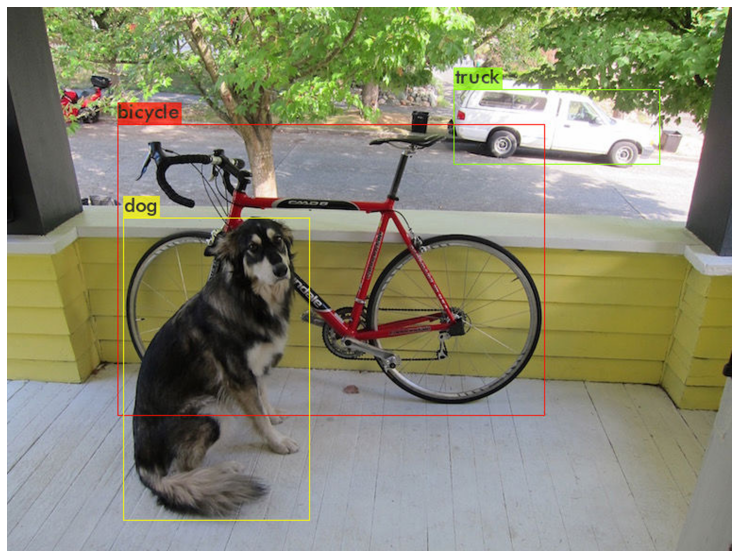

In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

#Mount drive


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

ln: failed to create symbolic link '/mydrive/My Drive': Operation not supported
 02-hhModelNervous.pdf
 1169__dfd8297.pdf
'1.mountain book its good.pdf'
 20170816_214617.mp4
'8-Solicitud de avances.gsheet'
'8-Solicitud de avances.xlsx'
'ACÚSTICA EN UN ESPACIO CERRADO.pdf'
'ACÚSTICA EN UN ESPACIO CERRADO.pptm'
 Anticoagulantes.gslides
 Arquimedes1.pdf
 Benchmark1.gslides
'brazilian rhythms for guitar - Renato Candro.pdf'
'casos contaminados.pptx.gslides'
 Clase-13-Integral.pdf
 Classroom
'Colab Notebooks'
'Convocatoria Fraccionamiento de Matrícula 2016-03 .ppt'
 cosas
 Electromagnetismo_Alonso.pdf
'Epson iPrint'
'equivalente mecánico.gsheet'
'equivalente mecánico.xlsx'
'Griffiths - Introduction to quantum mechanics.pdf'
 hi.ipynb
'Hoja de cálculo sin título.gsheet'
'Idilio1 - Guitar.jpg'
 images
'Informe 3.docx'
'Informe 3.docx.gdoc'
 Kleber-Daum-Machado-Teoria-Do-Eletromagnetismo-Vol-1.pdf
 Kleber_Daum_Machado_-_Teoria_do_Eletromagnetismo_-_Vol_2.pdf
 Kleber_Daum_Machado_-_Teori

In [ ]:
# run darknet command with google drive image (my image path is /images/plane.jpg)
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights /mydrive/Proyectofinal/svedbergface.png
imShow('predictions.jpg')

#datos para YOLOV3


In [ ]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/Proyectofinal

backup		   Images  obj.data   obj.zip		    svedbergface.png
generate_train.py  log	   obj.names  ProyectoFinalSI.gdoc  yolov3_custom2.cfg


In [ ]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/Proyectofinal/obj.zip ../

In [ ]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
replace data/obj/20110817_013.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace data/obj/20110817_013.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n A
replace data/obj/20110817_030.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

#Configuración de datos para entrenar


In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/Proyectofinal/yolov3_custom2.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/Proyectofinal/obj.names ./data
!cp /mydrive/Proyectofinal/obj.data  ./data

In [ ]:
# upload the generate_train.py script to cloud VM from Google Drive
!cp /mydrive/Proyectofinal/generate_train.py ./

# upload the generate_train.py script to cloud VM from local machine (uncomment to use)
#upload()


Now we simply run the python script to do all the work for us.

In [ ]:
!python generate_train.py

In [ ]:
# verify train.txt can be seen in our darknet/data folder
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

URL transformed to HTTPS due to an HSTS policy
--2020-07-09 00:24:50--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74.2’

darknet53.conv.74.2 100%[===================>] 154.96M   494KB/s    in 4m 9s   

2020-07-09 00:29:00 (638 KB/s) - ‘darknet53.conv.74.2’ saved [162482580/162482580]



In [ ]:
 !ln -s "/mydrive/Proyectofinal/log" chartes

#TRAIN

In [ ]:
!sed -i 's/chart.png/chartes\/chart.png/g' src/image_opencv.cpp

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg darknet53.conv.74 | tee log.txt >> /mydrive/Proyectofinal/log/data.log -dont_show -map


Se han truncado las últimas 5000 líneas del flujo de salida.
 total_bbox = 206908, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.877039, GIOU: 0.874507), Class: 0.999725, Obj: 0.985381, No Obj: 0.004806, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.073137, iou_loss = 0.031798, total_loss = 0.104935 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.937894, GIOU: 0.936867), Class: 0.999691, Obj: 0.994040, No Obj: 0.000189, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.000009, iou_loss = 0.010106, total_loss = 0.010115 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 206913, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.813

#Si el proceso se detuvo se puede reanudar desde aqui


In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /mydrive/Proyectofinal/backup/yolov3_custom2_last.weights -dont_show


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
yolov3_custom2
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 4, batch = 64, time_steps = 1, train = 1 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

#Usando el detector

In [ ]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..


/content/darknet/cfg
sed: can't read yolov3_custom.cfg: No such file or directory
sed: can't read yolov3_custom.cfg: No such file or directory
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001

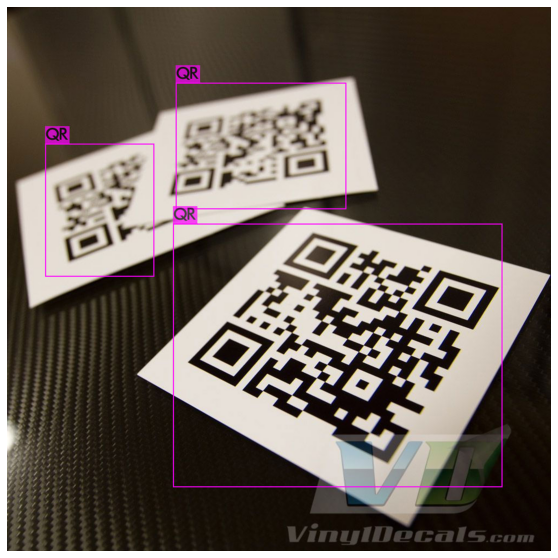

In [ ]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/Proyectofinal/backup/yolov3_custom2_last.weights /mydrive/Proyectofinal/Images/test.jpg -thresh 0.3
imShow('predictions.jpg')